In the first section of LinkedIn Learning's course on data visualization with Matplotlib and Seaborn, I created several graphs pertaining to national housing data, examining relationships between the categorical and quantitative variables contained within the raw dataset. The housing data consisted of 622339 cases, representing various metrics collected during a short time period for house listings between 2017 to 2023. These metrics included the total homes sold during that time, inventory, active listings, age of inventory, the median active list price, and the months of supply, as shown:

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv')
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   region_name               622339 non-null  object 
 1   period_begin              622339 non-null  object 
 2   period_end                622339 non-null  object 
 3   total_homes_sold          567839 non-null  float64
 4   inventory                 616247 non-null  float64
 5   active_listings           616905 non-null  float64
 6   age_of_inventory          616247 non-null  float64
 7   median_active_list_price  616513 non-null  float64
 8   months_of_supply          561319 non-null  float64
dtypes: float64(6), object(3)
memory usage: 42.7+ MB


Analyzing this housing dataset can prove to be useful not only for investors to forecast market trends and identify competitive investment opportunities, but also for suppliers to strategically place their firms to maximize market share, as well as for governments to optimize land use and assess infrastructure needs. 

The following time-series graph illustrates the changes in active median home listing prices over time for three California counties, (San Francisco, Los Angeles, and San Diego) as well as the average home price across all California counties. Despite the peak in the 30 Year Mortgage Rate from 2017-2018, San Francisco home prices nevertheless kept increasing, while home prices elsewhere remained mostly unchanged. 

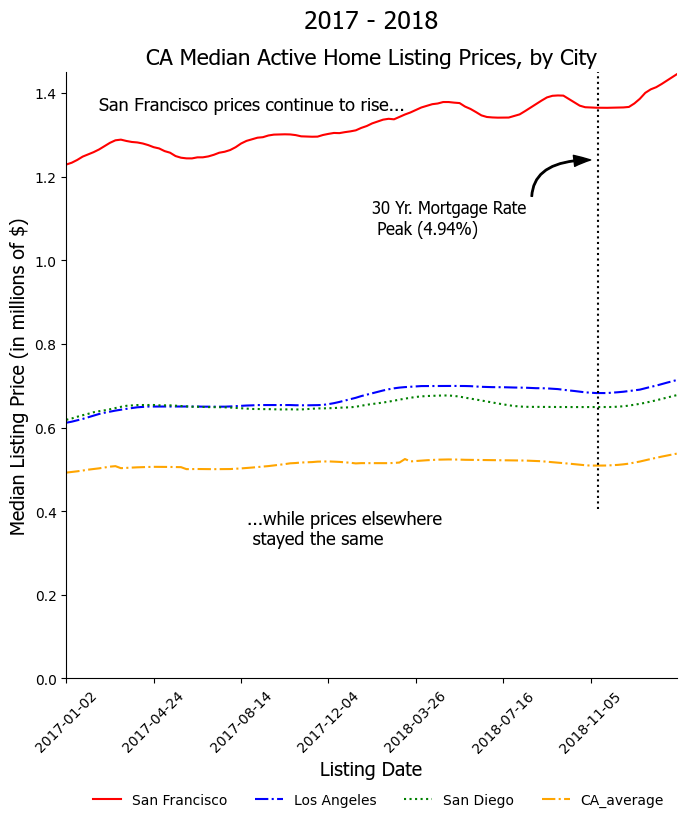

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
)

ca_housing_pivot = (
    ca_housing
        .pivot_table(index="period_begin",
            columns="region_name",
            values="median_active_list_price")
        .assign(CA_average = lambda x: x.mean(axis=1))
)

ca_homes_sold = (
    ca_housing_pivot
        .loc[:, ["San Francisco",
                 "Los Angeles",
                 "San Diego",
                 "CA_average"]]
)

def cm_to_inches(cm):
    return cm / 2.54

colors = ["red","blue","green","orange"]
ls = ["-","-.",":","-."]

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

for i, column in enumerate(ca_homes_sold.columns):
    ax.plot(
        ca_homes_sold[column] / 1000000,
        color = colors[i],
        ls = ls[i]
    )

fig.suptitle("2017 - 2018",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("CA Median Active Home Listing Prices, by City",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Listing Date",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Median Listing Price (in millions of $)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_xticks(ca_homes_sold.index[::16])
ax.xaxis.set_tick_params(rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(17168,17950)
ax.set_ylim(0,1.45)
ax.axvline(17850,
    ymin=0.28, ymax=1.1,
    c="black",
    ls=":"
          )
fig.legend(ca_homes_sold.columns,
    bbox_to_anchor=(0.9,-0.02),
    ncol=4,
    frameon=False)

ax.annotate("30 Yr. Mortgage Rate \n Peak (4.94%)",
    xy=(17840,1.24),
    xytext=(17560,1.1),
    arrowprops=dict(facecolor="black",
        width=1,
        headwidth=8,
        connectionstyle="angle3,angleA=90,angleB=0"),
    fontname="Tahoma",
    fontsize=12,
    color="black",
    verticalalignment="center"
           )

ax.text(17210,1.36,
    "San Francisco prices continue to rise...",
    fontsize=13,
    fontname="Tahoma"
       )
ax.text(17400,0.32,
    "...while prices elsewhere \n stayed the same",
    fontsize=13,
    fontname="Tahoma"
       )

plt.show()

Using a stacked line chart, we can see how many more homes are being sold—illustrated by the difference in height between layers—in San Francisco compared to in San Diego and Los Angeles. Cumulatively, home listing prices steadily increase, with San Francisco contributing the most to this price growth. Perhaps value drivers such as San Francisco's technology sector growth and employment rates makes the city attractive for consumers to move into, incentivizing real estate development and expansion. 

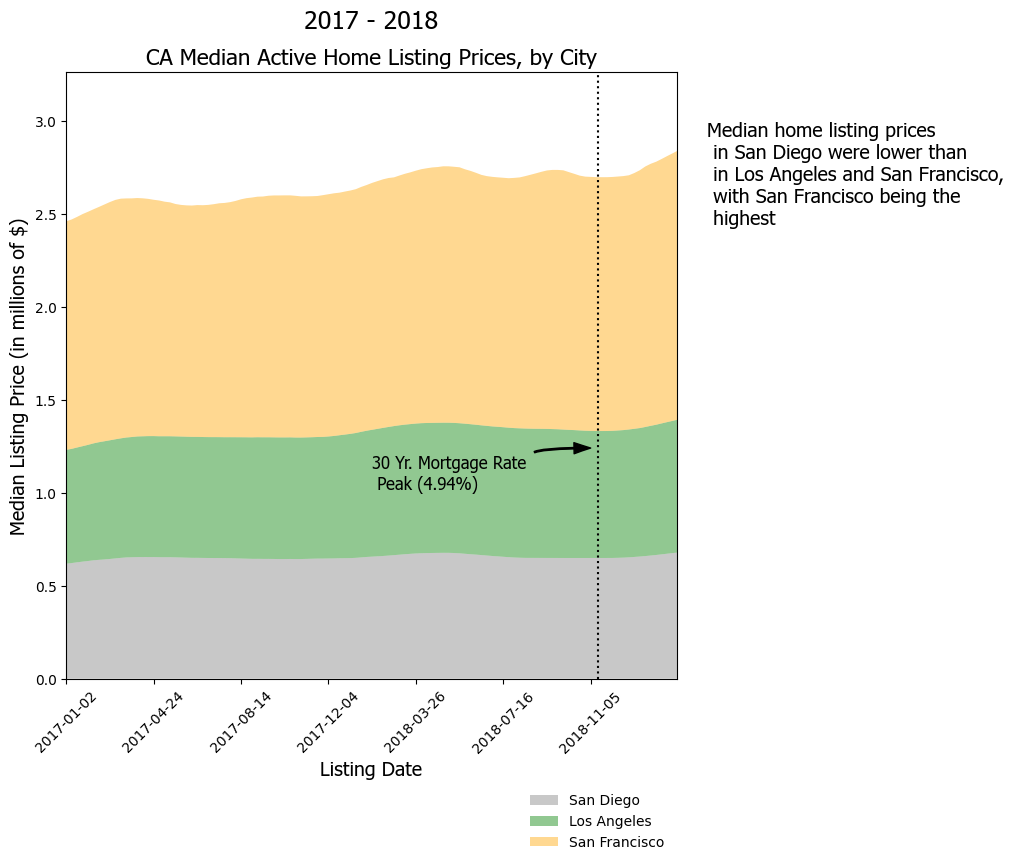

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
)

ca_housing_pivot = (
    ca_housing
        .pivot_table(index="period_begin",
            columns="region_name",
            values="median_active_list_price")
        .assign(CA_average = lambda x: x.mean(axis=1))
)

ca_homes_sold = (
    ca_housing_pivot
        .loc[:, ["San Francisco",
                 "Los Angeles",
                 "San Diego",
                 "CA_average"]]
)

def cm_to_inches(cm):
    return cm / 2.54

colors = ["grey","green","orange"]
labels = ["San Diego", "Los Angeles", "San Francisco"]

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

ax.stackplot(ca_homes_sold.index,
    ca_homes_sold["San Diego"] / 1000000, 
    ca_homes_sold["Los Angeles"] / 1000000,
    ca_homes_sold["San Francisco"] / 1000000,
    alpha=0.43,
    colors = colors,
    labels = labels
            )

fig.suptitle("2017 - 2018",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("CA Median Active Home Listing Prices, by City",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Listing Date",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Median Listing Price (in millions of $)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_xticks(ca_homes_sold.index[::16])
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlim(17168,17950)
ax.axvline(17850,
    c="black",
    ls=":"
          )
fig.legend(
    bbox_to_anchor=(0.9,-0.02),
    frameon=False)

ax.annotate("30 Yr. Mortgage Rate \n Peak (4.94%)",
    xy=(17840,1.24),
    xytext=(17560,1.1),
    arrowprops=dict(facecolor="black",
        width=1,
        headwidth=8,
        connectionstyle="angle3,angleA=90,angleB=0"),
    fontname="Tahoma",
    fontsize=12,
    color="black",
    verticalalignment="center"
           )

ax.text(1.05,0.75,
    "Median home listing prices \n in San Diego were lower than \n in Los Angeles and San Francisco, \n with San Francisco being the \n highest",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()

The following dual histogram illustrates differences in the quantity of active home listings—found at any given time between 2017-2018—between San Diego and San Francisco. One would be more likely to find active home listings in San Francisco versus San Diego, where the spread of active listings is narrow and scarce in frequency during this time.  

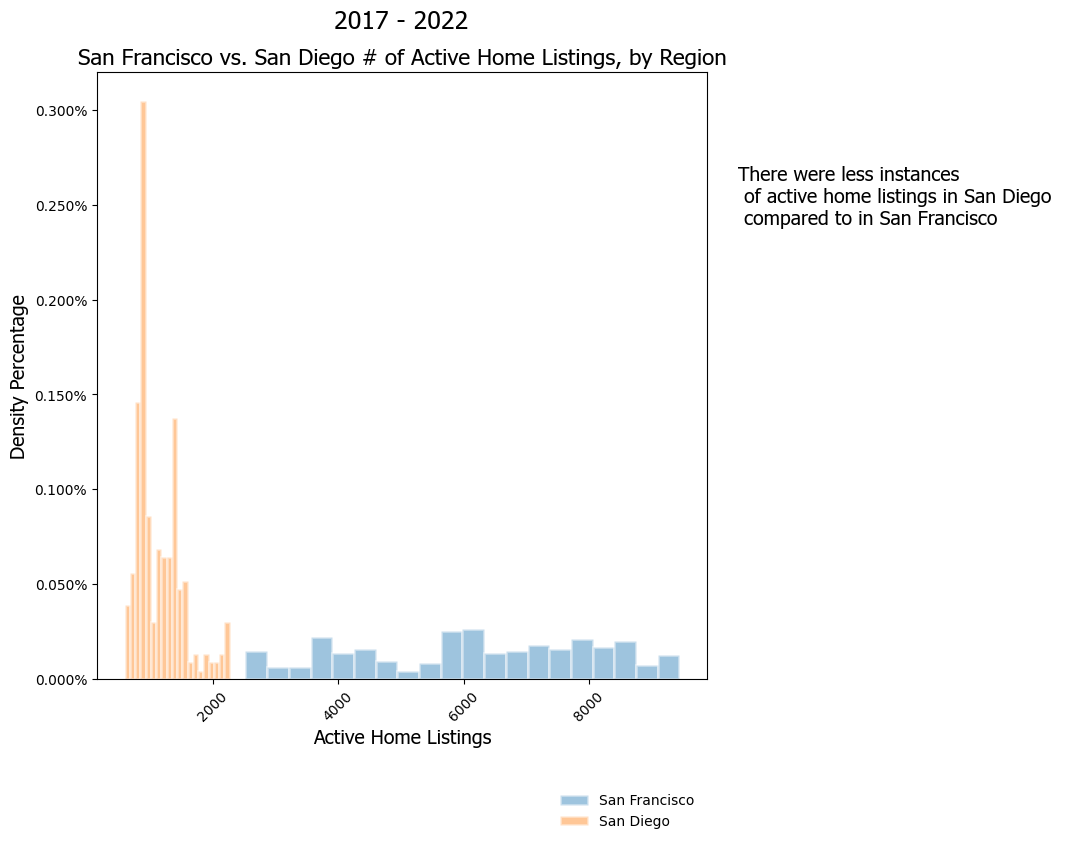

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

ax.hist(ca_housing.loc[(ca_housing["region_name"] == "San Diego"), ["active_listings"]],
    bins=20,
    alpha=0.43,
    density=True,
    edgecolor="white",
    linewidth=2,
       )

ax.hist(ca_housing.loc[(ca_housing["region_name"] == "San Francisco"), ["active_listings"]],
    bins=20,
    alpha=0.43,
    density=True,
    edgecolor="white",
    linewidth=2,
       )
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("San Francisco vs. San Diego # of Active Home Listings, by Region",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Active Home Listings",
    fontsize=14,
    fontname="Tahoma"
            )
ax.set_ylabel("Density Percentage",
    fontsize=14,
    fontname="Tahoma"
            )
ax.xaxis.set_tick_params(rotation=45)

fig.legend(["San Francisco","San Diego"], 
    bbox_to_anchor=(0.9,-0.02),
    frameon=False)
ax.text(1.05,0.75,
    "There were less instances \n of active home listings in San Diego \n compared to in San Francisco",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()

This dual axis time-series graph aims to compare the pre-pandemic housing market bubble with the housing market during COVID-19, by examining two variables before and after: months of sale and median active list price. Excessive borrowing before the pandemic caused housing prices to rise while the months of sale remained relatively short. Directly after the pandemic, pessimistic consumer expectations came with lower housing prices and longer months of sale, hence the drop in the red line and peak in the blue line to the right of the vertical line. 

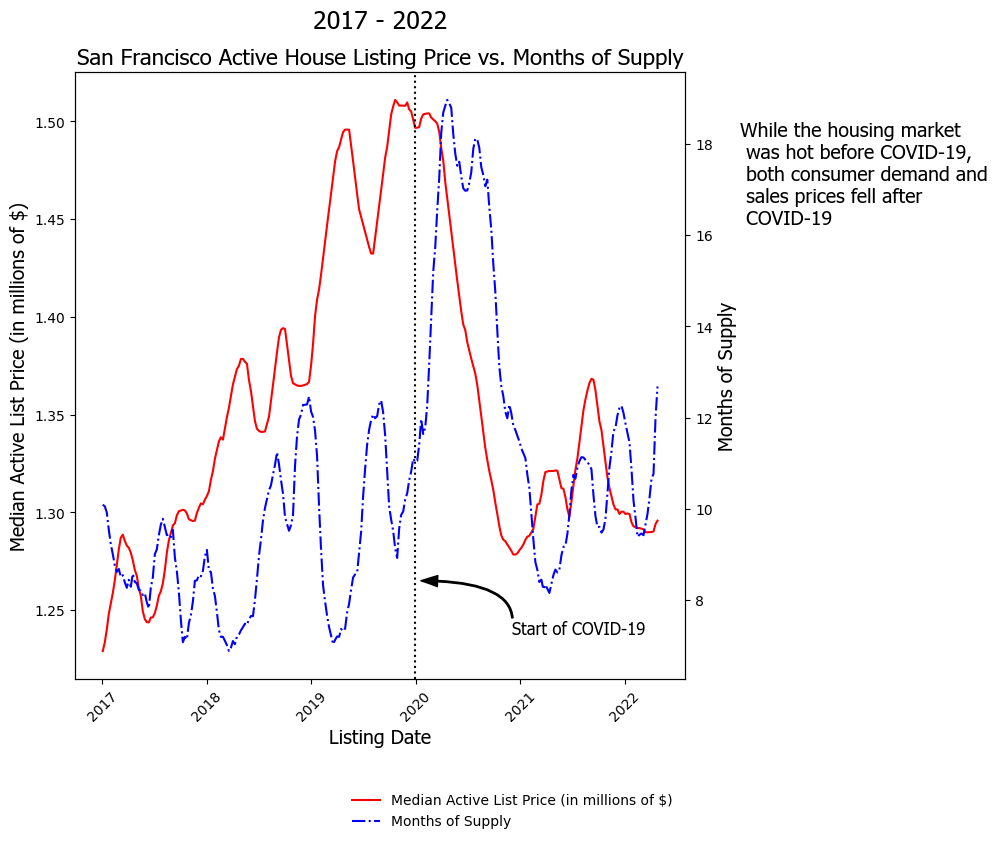

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
        .set_index("period_begin").sort_index()
)

sf_dual = (
    ca_housing
        .loc[(ca_housing["region_name"] == "San Francisco"), ["median_active_list_price","months_of_supply"]]
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

ax.plot(sf_dual.index,
    sf_dual["median_active_list_price"]/1000000,
    color="red",
    ls="-",
    label="Median Active List Price (in millions of $)"
       )

ax2=ax.twinx()

ax2.plot(sf_dual.index,
    sf_dual["months_of_supply"],
    color="blue",
    ls="-.",
    label="Months of Supply"
       )

fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("San Francisco Active House Listing Price vs. Months of Supply",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Listing Date",
    fontsize=14,
    fontname="Tahoma"
            )
fig.legend(
    bbox_to_anchor=(0.9,-0.02),
    frameon=False)
ax.axvline(18260,
    c="black",
    ls=":")
ax.annotate("Start of COVID-19",
    xy=(18280,1.265),
    xytext=(18600,1.24),
    arrowprops=dict(facecolor="black",
        width=1,
        headwidth=8,
        connectionstyle="angle3,angleA=90,angleB=0"),
    fontname="Tahoma",
    fontsize=12,
    color="black",
    verticalalignment="center"
           )
ax.xaxis.set_tick_params(rotation=45)
ax.set_ylabel("Median Active List Price (in millions of $)",
    fontsize=14,
    fontname="Tahoma"
            )
ax2.set_ylabel("Months of Supply",
    fontsize=14,
    fontname="Tahoma"
            )

ax.text(1.09,0.75,
    "While the housing market \n was hot before COVID-19, \n both consumer demand and \n sales prices fell after \n COVID-19",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()

Upon applying a moving average to the median active listing price series, and a dual combination chart layout, one can better see the contraction in the real estate market after COVID-19 hit in 2020:

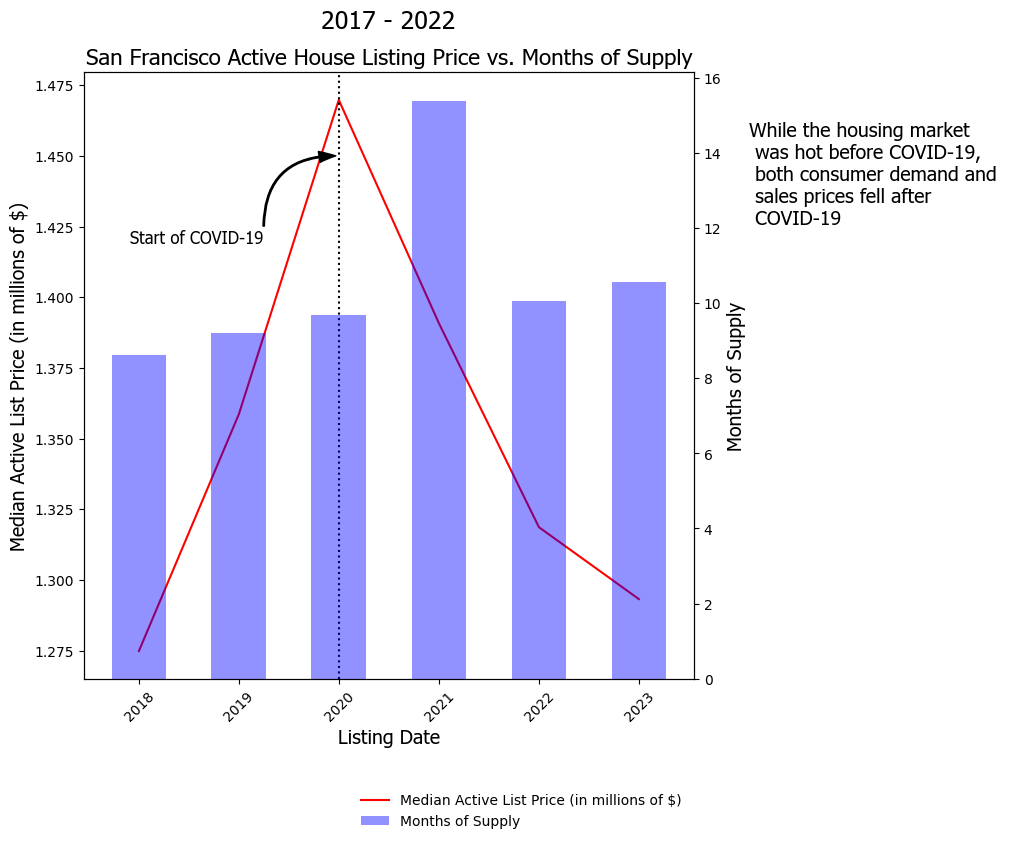

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
        .set_index("period_begin").sort_index()
)

sf_dual = (
    ca_housing
        .loc[(ca_housing["region_name"] == "San Francisco"), ["median_active_list_price","months_of_supply"]]
)

sf_dual2 = sf_dual.resample('YE').mean()

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

ax.plot(sf_dual2.index,
    sf_dual2["median_active_list_price"]/1000000,
    color="red",
    ls="-",
    label="Median Active List Price (in millions of $)"
       )

ax2=ax.twinx()

width=200

ax2.bar(x=sf_dual2.index,
    height=sf_dual2["months_of_supply"],
    color="blue",
    alpha=0.43,
    label="Months of Supply",
        width=width
       )

fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("San Francisco Active House Listing Price vs. Months of Supply",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Listing Date",
    fontsize=14,
    fontname="Tahoma"
            )
fig.legend(
    bbox_to_anchor=(0.9,-0.02),
    frameon=False)
ax.xaxis.set_tick_params(rotation=45)
ax.set_ylabel("Median Active List Price (in millions of $)",
    fontsize=14,
    fontname="Tahoma"
            )
ax2.set_ylabel("Months of Supply",
    fontsize=14,
    fontname="Tahoma"
            )

ax.text(1.09,0.75,
    "While the housing market \n was hot before COVID-19, \n both consumer demand and \n sales prices fell after \n COVID-19",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )
ax.axvline(18260,
    c="black",
    ls=":")
ax.annotate("Start of COVID-19",
    xy=(18250,1.45),
    xytext=(17500,1.421),
    arrowprops=dict(facecolor="black",
        width=1,
        headwidth=8,
        connectionstyle="angle3,angleA=90,angleB=0"),
    fontname="Tahoma",
    fontsize=12,
    color="black",
    verticalalignment="center"
           )

plt.show()

While useful to see trends, a scatterplot would be a better fit to analyze a possible correlation between the variables. As it turns out, median active listing prices and months of sale are only loosely correlated, the size of each dot representing the inventory size at a particular time between 2017 and 2022. Examining correlation between listing prices and months of supply is particularly useful for stakeholders to gauge whether the housing market is hot or cold, and whether to lower or increase prices at a certain time to increase market share/ revenue. 

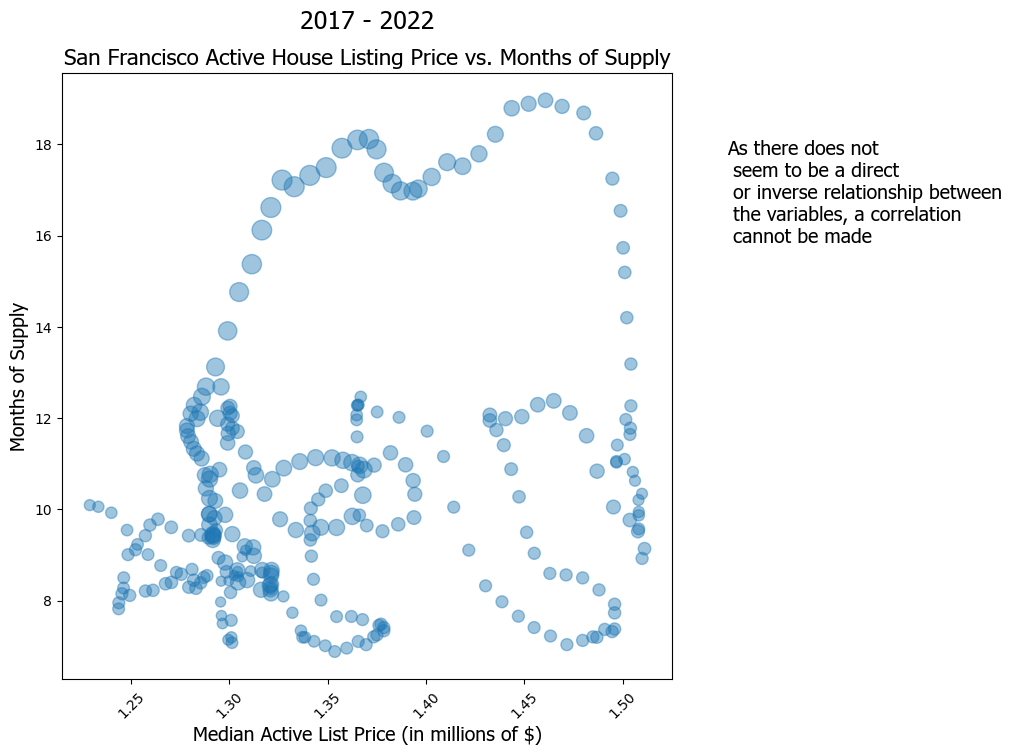

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

housing_raw = pd.read_csv('data/housing_data.csv',
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_homes_sold":"Int32","inventory":"Int32","active_listings":"Int32","region_name":"category"}
                         )

ca_housing = (
    housing_raw
        .loc[(housing_raw["region_name"].str.contains("CA"))]
        .assign(region_name = housing_raw["region_name"].str[0:-11])
        .set_index("period_begin").sort_index()
)

sf_dual = (
    ca_housing
        .loc[(ca_housing["region_name"] == "San Francisco"), ["median_active_list_price","months_of_supply", "inventory"]]
)

def cm_to_inches(cm):
    return cm / 2.54

fig, ax = plt.subplots(figsize=(cm_to_inches(20),cm_to_inches(20)))

ax.scatter(
    x=sf_dual["median_active_list_price"]/1000000,
    y=sf_dual["months_of_supply"],
    alpha=0.43,
    s = (sf_dual["inventory"] /10)
          )
fig.suptitle("2017 - 2022",
    fontsize=18,
    fontname="Tahoma",
    y=0.96,
    x=0.512
            )
ax.set_title("San Francisco Active House Listing Price vs. Months of Supply",
    fontsize=16,
    fontname="Tahoma"
            )
ax.set_xlabel("Median Active List Price (in millions of $)",
    fontsize=14,
    fontname="Tahoma"
            )
ax.xaxis.set_tick_params(rotation=45)
ax.set_ylabel("Months of Supply",
    fontsize=14,
    fontname="Tahoma"
            )
ax.text(1.09,0.72,
    "As there does not \n seem to be a direct \n or inverse relationship between \n the variables, a correlation \n cannot be made",
    transform=ax.transAxes,
    fontsize=14,
    fontname="Tahoma"
       )

plt.show()